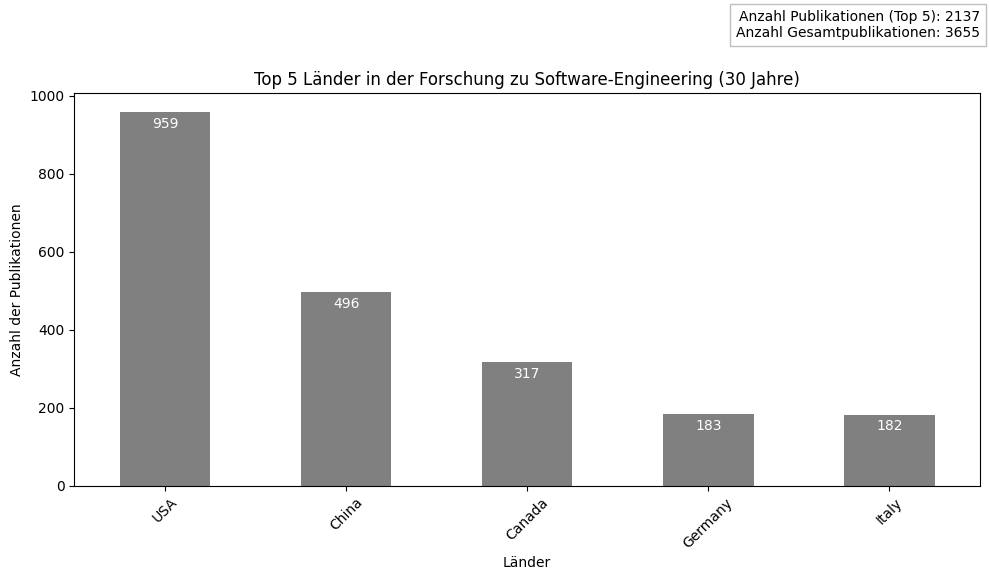

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Den Pfad zur CSV-Datei definieren (angenommen, sie liegt im 'data'-Ordner deines Projekts)
csv_file_path = os.path.join(os.getcwd(), '..', 'Data', 'Dataset.csv')

# CSV-Datei einlesen
df = pd.read_csv(csv_file_path)

#-------------------------------------------------------------------------------
# Welche 5 Länder sind Spitzenreiter in der Forschung?

# Extrahieren der Länder aus den Affiliations
df['Country'] = df['Author Affiliations'].dropna().apply(lambda x: x.split(',')[-1].strip())

# Die häufigsten 5 Länder identifizieren
top_countries = df['Country'].value_counts().head(5)

# Gesamte Anzahl der Publikationen der Top 5 Länder
total_top_5 = top_countries.sum()

# Gesamte Anzahl der Publikationen insgesamt
total_publications = df['Country'].value_counts().sum()

# Ausgabe der Top 5 Länder als Bar-Chart
plt.figure(figsize=(10, 6))
ax = top_countries.plot(kind='bar', color='gray')
plt.title('Top 5 Länder in der Forschung zu Software-Engineering (30 Jahre)')
plt.ylabel('Anzahl der Publikationen')
plt.xlabel('Länder')
plt.xticks(rotation=45)

# Werte auf die Balken schreiben
for index, value in enumerate(top_countries):
    plt.text(index, value - 40, str(value), ha='center', color='white')

# Text oben rechts hinzufügen
plt.text(
    x=4.5, y=max(top_countries) * 1.2, 
    s=f"Anzahl Publikationen (Top 5): {total_top_5}\nAnzahl Gesamtpublikationen: {total_publications}",
    fontsize=10, ha='right', bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray')
)

plt.tight_layout()

# Grafik anzeigen
plt.show()